In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # For plotting
from nltk.tokenize import word_tokenize # For tokenizing the words
from nltk.corpus import stopwords # To Remove the stop words
from collections import Counter # To build the category

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize # To tokenize sentences
ps = PorterStemmer() # To perform stemming

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/news-category-dataset/News_Category_Dataset_v2.json


In [5]:
# Converting the json to data frame 
base_df = pd.read_json('../input/news-category-dataset/News_Category_Dataset_v2.json', lines=True)
base_df.head(5)

# Dropping the other not relevant data
base_df = base_df.drop(['authors','link','date','short_description'], axis = 1)
base_df.head(3)

,category,headline
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57


In [6]:
# Lowering all the text 
base_df['headline'] = base_df['headline'].str.lower()
base_df.head(1)

,category,headline
0,CRIME,there were 2 mass shootings in texas last week...


Number of total categories is:  41


<AxesSubplot:>

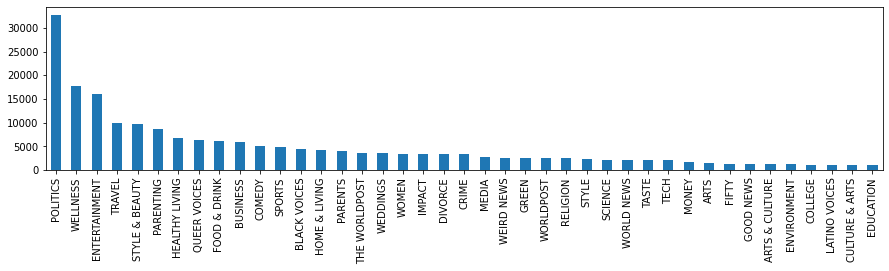

In [7]:
# Calculating the total number of classes
category_wise_df = base_df.groupby('category')
print(f"Number of total categories is: ", category_wise_df.ngroups)

# Plotting the total number of news by category for better visualization
plt.figure(figsize=(15, 3))
base_df['category'].value_counts().plot(kind='bar')

In [8]:
# Filtering the categories into 5 distinct categories
sample_df = pd.DataFrame()
valid_test_category = ['POLITICS','MONEY','RELIGION','SPORTS','ENVIRONMENT']
for category in valid_test_category:
    sample_df = sample_df.append(base_df[base_df['category'] == category])
print(sample_df)
print(base_df)

           category                                           headline
13         POLITICS  trump's crackdown on immigrant parents puts mo...
14         POLITICS  'trump's son should be concerned': fbi obtaine...
15         POLITICS  edward snowden: there's no one trump loves mor...
16         POLITICS  booyah: obama photographer hilariously trolls ...
17         POLITICS  ireland votes to repeal abortion amendment in ...
...             ...                                                ...
200828  ENVIRONMENT  boxer puppy and cows make friends during walk ...
200829  ENVIRONMENT  'black smoker' vents: new species discovered n...
200830  ENVIRONMENT                      green activists: 50 and older
200831  ENVIRONMENT  winter weather photo contest: submit your own ...
200832  ENVIRONMENT          insects top newly discovered species list

[43209 rows x 2 columns]
             category                                           headline
0               CRIME  there were 2 mass shooting

In [9]:
# Divide the dataset into train, validate/develop and test 
train_base, validate, test = \
            np.split(sample_df.sample(frac=1, random_state=42), 
                    [int(.6*len(sample_df)), int(.8*len(sample_df))])

print(f"The total number of sentences in train is {len(train_base)}")
print(f"The total number of sentences in validate is {len(validate)}")
print(f"The total number of sentences in test is {len(test)}")
print(f"The total number of sentence in the entire dataset is {len(sample_df)}")

The total number of sentences in train is 25925
The total number of sentences in validate is 8642
The total number of sentences in test is 8642
The total number of sentence in the entire dataset is 43209


<AxesSubplot:>

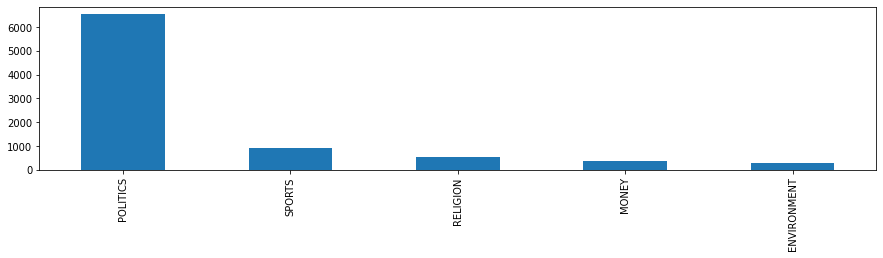

In [12]:
# Plotting the total number of news by category for better visualization for validation
plt.figure(figsize=(15, 3))
validate['category'].value_counts().plot(kind='bar')

In [11]:
train = train_base.copy()

<AxesSubplot:>

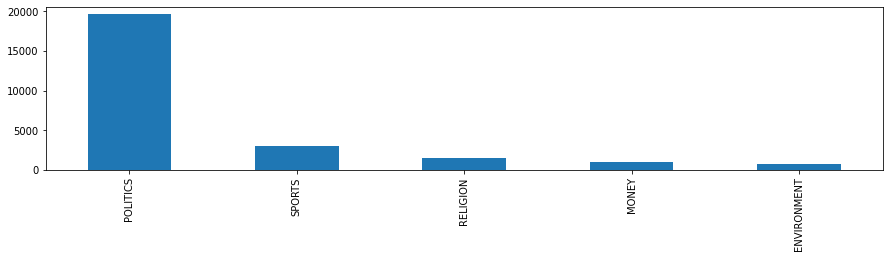

In [13]:
# Plotting the total number of news by category for better visualization for train
plt.figure(figsize=(15, 3))
train['category'].value_counts().plot(kind='bar')

In [14]:
# Building the master dictionary that contains the word frequency
master_dict = {}
stop_words = set(stopwords.words('english'))
def to_dictionary(category):    
    vocab = []
    sentences = category
    for i in sentences:
        tokenized_sents= word_tokenize(i)
        for word in tokenized_sents:
            if(word not in stop_words and word.lower() and word.isalpha()):
                vocab.append(ps.stem(word))
    word_dic = Counter(vocab)
    return word_dic

for category in train['category'].unique():
    category_temp = train[train['category']== category]
    temp_dict = to_dictionary(category_temp['headline'])
    master_dict[category]= temp_dict

In [15]:
# Converting the dictionary to data frame for ease of use
word_frequency_df = pd.DataFrame(master_dict).fillna(0)
word_frequency_df 

,POLITICS,SPORTS,RELIGION,ENVIRONMENT,MONEY
andrew,30.0,11.0,0.0,0.0,0.0
anglin,4.0,0.0,0.0,0.0,0.0
lawyer,124.0,5.0,0.0,0.0,0.0
visit,72.0,6.0,19.0,0.0,0.0
elus,1.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...
octomom,0.0,0.0,0.0,0.0,1.0
learnvest,0.0,0.0,0.0,0.0,1.0
picard,0.0,0.0,0.0,0.0,1.0
landlord,0.0,0.0,0.0,0.0,1.0


In [16]:
# Omitting the rare words : word with frequency less than 5
rslt_df = word_frequency_df.copy()
rslt_df["sum"] = rslt_df.sum(axis=1)
rslt_df = rslt_df[rslt_df['sum'] > 1]
rslt_df = rslt_df.drop(columns = 'sum')
word_frequency_df = rslt_df.copy()
word_frequency_df

,POLITICS,SPORTS,RELIGION,ENVIRONMENT,MONEY
andrew,30.0,11.0,0.0,0.0,0.0
anglin,4.0,0.0,0.0,0.0,0.0
lawyer,124.0,5.0,0.0,0.0,0.0
visit,72.0,6.0,19.0,0.0,0.0
elus,1.0,0.0,1.0,2.0,1.0
...,...,...,...,...,...
waitress,0.0,0.0,0.0,0.0,2.0
lifestyl,0.0,0.0,0.0,0.0,2.0
carpool,0.0,0.0,0.0,0.0,2.0
regift,0.0,0.0,0.0,0.0,2.0


In [17]:
# Building the dictionary that holds category wise sums and word wise probabilities
categories_to_iterate = list(word_frequency_df) #Prepared category for zip
category_sum = []
for category in categories_to_iterate:
    category_sum.append(word_frequency_df[category].sum()) # Prepared category sum for zip
dict_category_sum = dict(zip(categories_to_iterate,category_sum)) # Dictionary with category based sums
print(f"The dictionary that holds the cateogry wise sum is {dict_category_sum}")

dict_category_wise_probability = dict_category_sum.copy()

total_sentences_values = dict_category_wise_probability.values()
total = sum(total_sentences_values)

for key,value in dict_category_wise_probability.items():
    dict_category_wise_probability[key] = value / total
print(f"The dictionay that holds the category wise probabilities is {dict_category_wise_probability}")
    

The dictionary that holds the cateogry wise sum is {'POLITICS': 133599.0, 'SPORTS': 20466.0, 'RELIGION': 7979.0, 'ENVIRONMENT': 4907.0, 'MONEY': 5857.0}
The dictionay that holds the category wise probabilities is {'POLITICS': 0.7731065691403176, 'SPORTS': 0.11843201703624832, 'RELIGION': 0.04617263089671775, 'ENVIRONMENT': 0.028395676126105274, 'MONEY': 0.033893106800611084}


In [19]:
# Building word probability with the application of smoothing
prob_df = word_frequency_df
for category in categories_to_iterate:
    for index,row in prob_df.iterrows():
        row[category] = ((row[category]+1) / (dict_category_sum[category]+len(prob_df[category]))) # Smoothing
        prob_df.at[index,category] = row[category]
prob_df

,POLITICS,SPORTS,RELIGION,ENVIRONMENT,MONEY
andrew,0.000007,0.000036,0.000065,0.000081,0.000076
anglin,0.000007,0.000036,0.000065,0.000081,0.000076
lawyer,0.000007,0.000036,0.000065,0.000081,0.000076
visit,0.000007,0.000036,0.000065,0.000081,0.000076
elus,0.000007,0.000036,0.000065,0.000081,0.000076
...,...,...,...,...,...
waitress,0.000007,0.000036,0.000065,0.000081,0.000076
lifestyl,0.000007,0.000036,0.000065,0.000081,0.000076
carpool,0.000007,0.000036,0.000065,0.000081,0.000076
regift,0.000007,0.000036,0.000065,0.000081,0.000076


In [20]:
# For tokenizing the words and putting it into the word list
def return_word_list(sentence):
    tokenized_sentence = word_tokenize(sentence)
    for word in tokenized_sentence:
        if(word.lower() not in stop_words and word.isalpha()):
            word_list.append(ps.stem(word.lower()))
    return word_list

# For finding the conditional probability
def return_category_probability_dictionary(word_list,probab,prob_df,pro):
    help_dict = {}
    for i, row in probab.iterrows():
        for word in word_list:
            if(word in prob_df.index.tolist()):
                pro = pro * probab.loc[i,word] 
        help_dict[i] =  pro*dict_category_wise_probability[i]
        pro = 1
    return help_dict

In [23]:
Counter_total = 0
match = 0

probab = prob_df.transpose()
indexes = []
for ind in prob_df.index.tolist():
    indexes.append(ind.lower())

pro = 1
help_dict = {}
word_list = [] 
sentences = pd.DataFrame()

match = 0
total = 0
validate_test = pd.DataFrame()

# Predicting the classes based on the conditional probabilities
for ind,main_row in test.sample(n=200).iterrows():
    sentence = main_row['headline']
    word_list = return_word_list(sentence)
    
    # Get the dictionary that contains the final probability P(word|category)
    help_dict = return_category_probability_dictionary(word_list,probab,prob_df,pro)
    
    if(main_row['category'] == max(help_dict, key=help_dict.get)):
        match = match + 1 
    total = total + 1
    
print(f"The model predicted {match} correctly of {total}")
print(f"The model accuracy then is {int((match/total)*100)}%")

The model predicted 153 correctly of 200
The model accuracy then is 76%


Top 10 predicting words

In [24]:
columns = list(prob_df)
top_10 = {}
for category in columns:
    top_10[category] = prob_df[category].nlargest(n=10)
    
for key,value in top_10.items():
    print(f"For the category {key} the top 10 words are ->")
    print(f"{str(value)}")
    

For the category POLITICS the top 10 words are ->
trump         0.000007
donald        0.000007
say           0.000007
gop           0.000007
clinton       0.000007
obama         0.000007
republican    0.000007
democrat      0.000007
hillari       0.000007
new           0.000007
Name: POLITICS, dtype: float64
For the category SPORTS the top 10 words are ->
nfl        0.000036
olymp      0.000036
player     0.000036
game       0.000036
video      0.000036
win        0.000036
team       0.000036
world      0.000036
footbal    0.000036
fan        0.000036
Name: SPORTS, dtype: float64
For the category RELIGION the top 10 words are ->
pope         0.000066
church       0.000065
franci       0.000065
muslim       0.000065
christian    0.000065
medit        0.000065
daili        0.000065
new          0.000065
faith        0.000065
religion     0.000065
Name: RELIGION, dtype: float64
For the category ENVIRONMENT the top 10 words are ->
photo      0.000082
anim       0.000082
week       0.00008

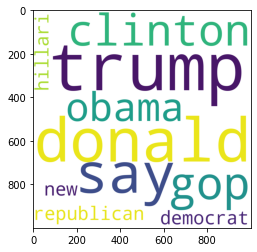

In [25]:

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#'POLITICS','MONEY','RELIGION','SPORTS','ENVIRONMENT'
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10['POLITICS'])
plt.imshow(wc)



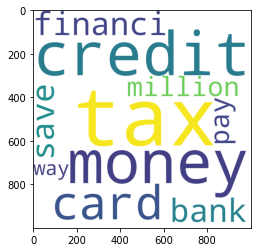

In [26]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10['MONEY'])
plt.imshow(wc)

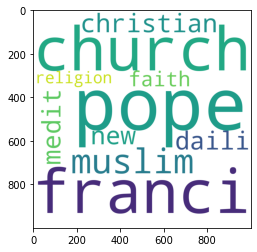

In [27]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10['RELIGION'])
plt.imshow(wc)

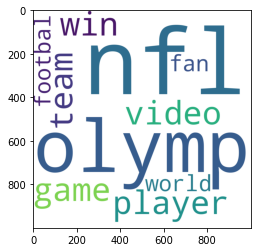

In [28]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10['SPORTS'])
plt.imshow(wc)

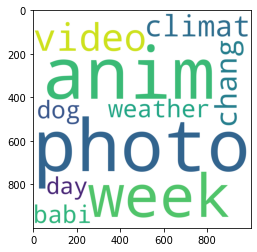

In [29]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(top_10['ENVIRONMENT'])
plt.imshow(wc)